<a href="https://colab.research.google.com/github/abdelkadermiladi/KMeans-Clustering/blob/main/K_means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 K-means Clustering 

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
class KMeans:
    def __init__(self, k=2, max_iterations=100):
        self.k = k
        self.max_iterations = max_iterations

    def fit(self, X):
        # Initialize the centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False)]

        for i in range(self.max_iterations):
            # Calculate the distances between the data points and the centroids
            distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])

            # Assign each data point to the nearest centroid
            self.labels = np.argmin(distances, axis=0)

            # Update the centroids by taking the mean of all the data points assigned to each centroid
            new_centroids = np.array([X[self.labels == j].mean(axis=0) for j in range(self.k)])

            # If the centroids did not change, stop the iterations
            if np.allclose(new_centroids, self.centroids):
                break

            self.centroids = new_centroids

    def predict(self, X):
        distances = np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        return np.argmin(distances, axis=0)

In [38]:
# Load the data from a csv file
data = pd.read_csv("driver-data.csv")

In [39]:
# Delete the "id" column
data = data.drop("id", axis=1)

In [54]:
# Convert the data to a numpy array
X = data.values

In [55]:
X

array([[ 71.24,  28.  ],
       [ 52.53,  25.  ],
       [ 64.54,  27.  ],
       ...,
       [170.91,  12.  ],
       [176.14,   5.  ],
       [168.03,   9.  ]])

In [65]:
# Create an instance of the KMeans class
kmeans = KMeans(k=3)

In [66]:
# Fit the KMeans model to the data
kmeans.fit(X)

In [67]:
# Get the centroids and the labels
centroids = kmeans.centroids


In [68]:
centroids

array([[ 41.64592691,   7.07574751],
       [ 57.54238797,  10.38148585],
       [180.09647059,  18.30788486]])

In [70]:
labels = kmeans.predict(X)

In [71]:
labels

array([1, 1, 1, ..., 2, 2, 2])

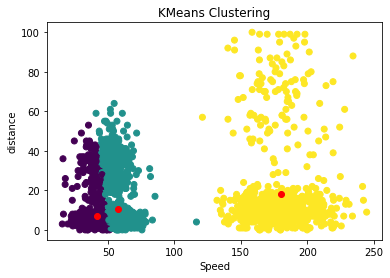

In [72]:
# Plot the data points colored according to their cluster
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.xlabel("Speed")
plt.ylabel("distance")

plt.scatter(centroids[:,0], centroids[:,1],color='red')

# Add a title to the plot
plt.title("KMeans Clustering")
plt.show()

In [75]:
# Add the cluster id as a new column in the dataframe
data["Cluster ID"] = labels

# Save the updated dataframe to a new CSV file
data.to_csv("data-driver_with_cluster_id.csv", index=False)


In [76]:
# Count the number of data points in each cluster
cluster_counts = np.unique(labels, return_counts=True)[1]

# Print the count for each cluster
for i, count in enumerate(cluster_counts):
    print(f"Cluster {i} has {count} data points")


Cluster 0 has 1505 data points
Cluster 1 has 1696 data points
Cluster 2 has 799 data points
